# Lab 3 - Signal detection theory

Here we will expand on the issue of optimally detecting signal from noise.

This lab has two main components designed to go over the basics of signal detection theory.

1. Simulate a simple signal detection experiment.
2. Look at how changing aspects of the signal detection process impacts the receiver operating characteristics.

We won't be working with valentinos in this lab, but will return to them a bit later.

## Background

In this lab we will visit the basics of signal detection theory. I'll be using SDT to refer to signal detection theory from here on out.

**Components of SDT**

1. *The noise distribution.* This is assumed to be a standard Gaussian (Normal) distribution, with a mean of 0 and standard deviation of 1. We typically write this as $N(0,1)$.

2. *The signal distribution.* This will always have the same variance as the noise distribution, but with a different mean. The mean of the signal distribution is called *d-prime* (or $d'$) and by convention we represent it as a positive number. The $d'$ reflects the signal-to-noise ratio.

3. *Threshold.* This is also referred to as the strategy of the observer/agent and is sometimes referenced just as $C$.

4. *Ideal observer threshold.* This is the _statistically optimal_ separation between the noise and signal distributions. Because they have the same standard deviations, the ideal observer is just $\frac{d'}{2}$.


**Outcomes**

An experiment to test the signal characteristics in biological systems typically involves presenting signals of different intensities in the context of background noise and having an agent make a response when a stimulus appears above their detection threshold. Often this detection is implicit and depends on the sensory systems of the agent.

By looking at the relationship between stimulus (signal present vs. signal absent) and responses (response made or not), we can estimate 4 different classes of outcomes based on the agent's responses.

1. *Hits.* When a signal was presented and a response was registered.

2. *Misses.* When a signal was presented and no response was registered.

3. *False alarms.* When no signal was presented and a response was registered.

4. *Correct rejections.* When no signal was presented and no response was registered.

From these we can directly estimate the signal-to-noise intensity for any agent by calculating the $d'$ behaviorally as:

$$ d' = \Phi(hits) - \Phi(false\ alarms)$$

Here $\Phi(\cdot)$ means that we have converted the rates to a $z-score$. Basically we treat the rates, bounded between $0$ and $1$, as the p-values of a standard normal distribution and use a lookup table to determine what z-score (i.e., standard deviations away from the mean) would produce that p-value. Note that z-scores can be positive or negative. So pay attention to the signs when calculating your $d'$

**Receiver operating characteristics (ROC)**

One way of visualizing signal characteristics is to run a set of experiments with different agents, who have different thresholds and perceptual characterisics (i.e., different noise standard deviations), and plot the results of each agent on a 2-dimensional graph. We assume that the signal characteristics are always the same. On the x-axis you plot false alarms and on the y-axis you plot hits. The characteristics of this curve reveal the characteristics of the signal to noise for that particular stimulus.

## Section - Setup

This lab is super simple. We will only need numpy for basic calculations and matplotlib for plotting. Later we will need scipy for some calculations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


### Notebook Config

Now let's do some tweaks to get the notebooks to render things nicely.

In [3]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "10"

# Dev
%load_ext autoreload
%autoreload 2

## Section 1 - Simulating an SDT experiment

Here we start by making a simple function that simulates the data we would get from a simple SDT experiment as described above.

For this function we will want 4 inputs:

1. An array of signal intensities (_signal_) on each trial.

2. An array of noise intensities (_noise_) on each trial.

3. The threshold of the simulated observer (_thresold_).

For our little experiment today we will assume that:

* The number of trials in the signal and noise vectors is the same.

Our function returns the hits, false alarms, misses, and correct rejections as _rates_ (i.e., bounded between 0 and 1).

In [4]:
def response_generate(signal, noise, threshold):
    # get the length of the two vectors (we assume they are the same)
    num_trials = len(signal)

    # hits are when the signal is presented and it is above the observer's threshold
    hits = np.sum((signal>threshold))/num_trials

    # false alarms are when the noise is presented and it is above the observer's threshold
    false_alarms = np.sum((noise > threshold))/num_trials

    # misses are when the signal is presented and it is below the observer's threshold
    misses = np.sum((signal<threshold))/num_trials

    # correct_rejections are when the noise is presented and it is below the observer's threshold
    correct_rejections = np.sum((noise < threshold))/num_trials

    # Everything is returned as a rate
    return hits, false_alarms, misses, correct_rejections

**Generating Data**

Let's set up basic parameters for a trial simulation.

In [28]:
# Parameters for simulating the data (signal + noise)
num_trials = 1000
signal_strength = 1.0
noise_std = 1.0
noise = np.random.normal(0, noise_std, num_trials)
signal = np.random.normal(signal_strength, noise_std, num_trials)

# Threshold for decision-making
threshold = 0.5

# Ideal observer separation
ideal_separation = signal_strength/2

So here we will have a $d'=1.0$, which means that the signal mean is 1 standard deviation away from the noise mean. We will also have the agent's threshold be $1.5$, which makes this agent slightly conservative.

**Analyze this agent's behavior**

In [29]:
# Compute hits and false alarms using the function
hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

# What was the performance?
print(f"Hit rate: {hits:.2f}")
print(f"False alarm rate: {false_alarms:.2f}")
print(f"Misses: {misses:.2f}")
print(f"Correct rejections: {correct_rejections:.2f}")


Hit rate: 0.70
False alarm rate: 0.30
Misses: 0.30
Correct rejections: 0.70


As we can see, the observer is performing pretty well all things considered. Let's plot these results to see it visually.

**Plot the signal and noise distributions**

Here we can plot the signal, the noise, the threshold, and the optimal/ideal separation position.

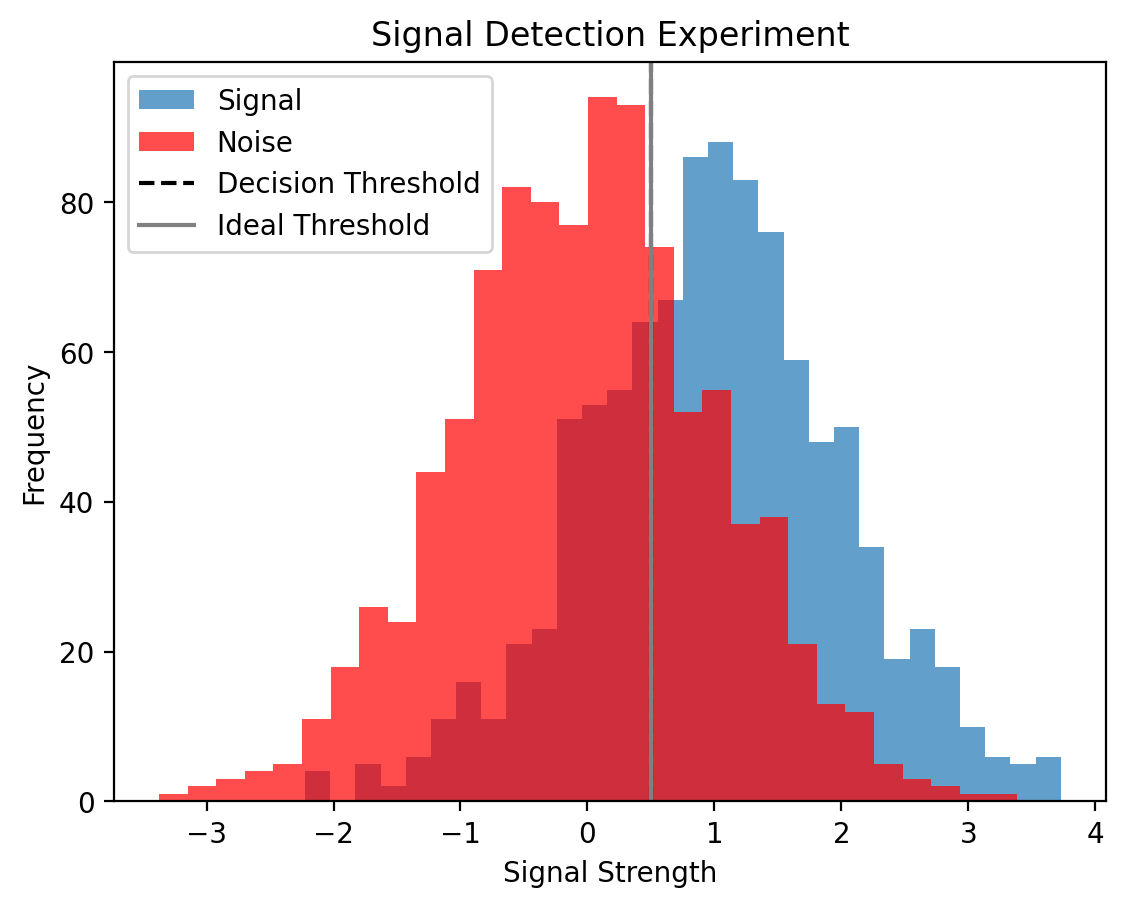

In [30]:
# Plot the signal distribution
plt.hist(signal, bins=30, alpha=0.7, label="Signal")
plt.hist(noise, bins=30, alpha=0.7, color='red', label="Noise")
plt.axvline(threshold, color="black", linestyle="--", label="Decision Threshold")
plt.axvline(ideal_separation, color="gray", linestyle="-", label="Ideal Threshold")
plt.xlabel("Signal Strength")
plt.ylabel("Frequency")
plt.title("Signal Detection Experiment")
plt.legend()
plt.show()


---
### Question 1.1

With the current parameters, is this agent conservative or liberal in their threshold. What is the degree of this conservative/liberal bias of the observer (i.e., $C$)?

__Answer:__

The agent is a little more conservative. The threshold for recognizing the signal is 1.5.

---
### Question 1.2

Re-run the simulations above, with the following parameters.

num_trials = 1000 \\
signal_strength = 1.0 \\
noise_std = 1.0 \\
threshold = 0.5 \\

_Question_: How does this change the performance of the agent? How do the performance measures (i.e., hits, false alarms, misses, and correct rejections) change. Also how does the bias of the agent's responses change?

__Answer:__

This caused the agent to respond to the signal more frequently. The hit rate and false alarm rate increased. The number of misses and correct rejections decreased. The bias is less conservative than before.

---
### Question 1.3

Using the _percent point function_ (ppf) from _scipy_ (i.e., _stats.norm.ppf_), calculate the $d'$ of the agent that you simulated for Question 1.2.

Show your calculations below and, as a comment, describe how well this matches the actual $d'$ (i.e., signal strenght) used int he simulation.

In [31]:
# Insert your d' calculation here

dprime = stats.norm.ppf(hits) - stats.norm.ppf(false_alarms)
dprime


1.0516880168844516

__Answer:__

This d' of 1.0517 is very close to the d' value used in the simulation (1.0).

---
### Question 1.4

Re-run the simulations above, with the following parameters.

num_trials = 1000 \\
signal_strength = 2.0 \\
noise_std = 1.0 \\
threshold = 1.5 \\

Then re-calculate the $d'$.

_Question_ : How did the $d'$ change? Is it moving with the signal strength?

In [27]:
# Insert your d' calculation here
dprime = stats.norm.ppf(hits) - stats.norm.ppf(false_alarms)
dprime


2.0232265614448326

__Answer:__

d' inccreased from 1.0517 to 2.0232. It is increasing as signal strength increases.

## Section 2 - Receiver operating characteristics

Here we are going to plot out the ROC curve for our simple agent. To do this we need to run through a batch of agents that have different thresholds, while keeping the signal and noise characteristics constant.

Let's start with writing a simple loop to simulate a set of 50 agents.

In [ ]:
# Vary the threshold to create an ROC curve
num_trials = 1000
num_agents = 50
noise_std = 1.0
signal_strength = 0.5
thresholds = np.linspace(-2, 6, num=num_agents)  # Vary threshold used
hit_rates = []
false_alarm_rates = []
correct_rejection_rates = []

for threshold in thresholds:
    # Simulate data (signal + noise)
    noise = np.random.normal(0, noise_std, num_trials)
    signal = np.random.normal(signal_strength, noise_std, num_trials)

    # Compute hits and false alarms using the function
    hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

    # Compute hit rate and false alarm rate
    hit_rates.append(hits)
    false_alarm_rates.append(false_alarms)
    correct_rejection_rates.append(correct_rejections)

Now we can plot the ROC curve. It is pretty simple to do.

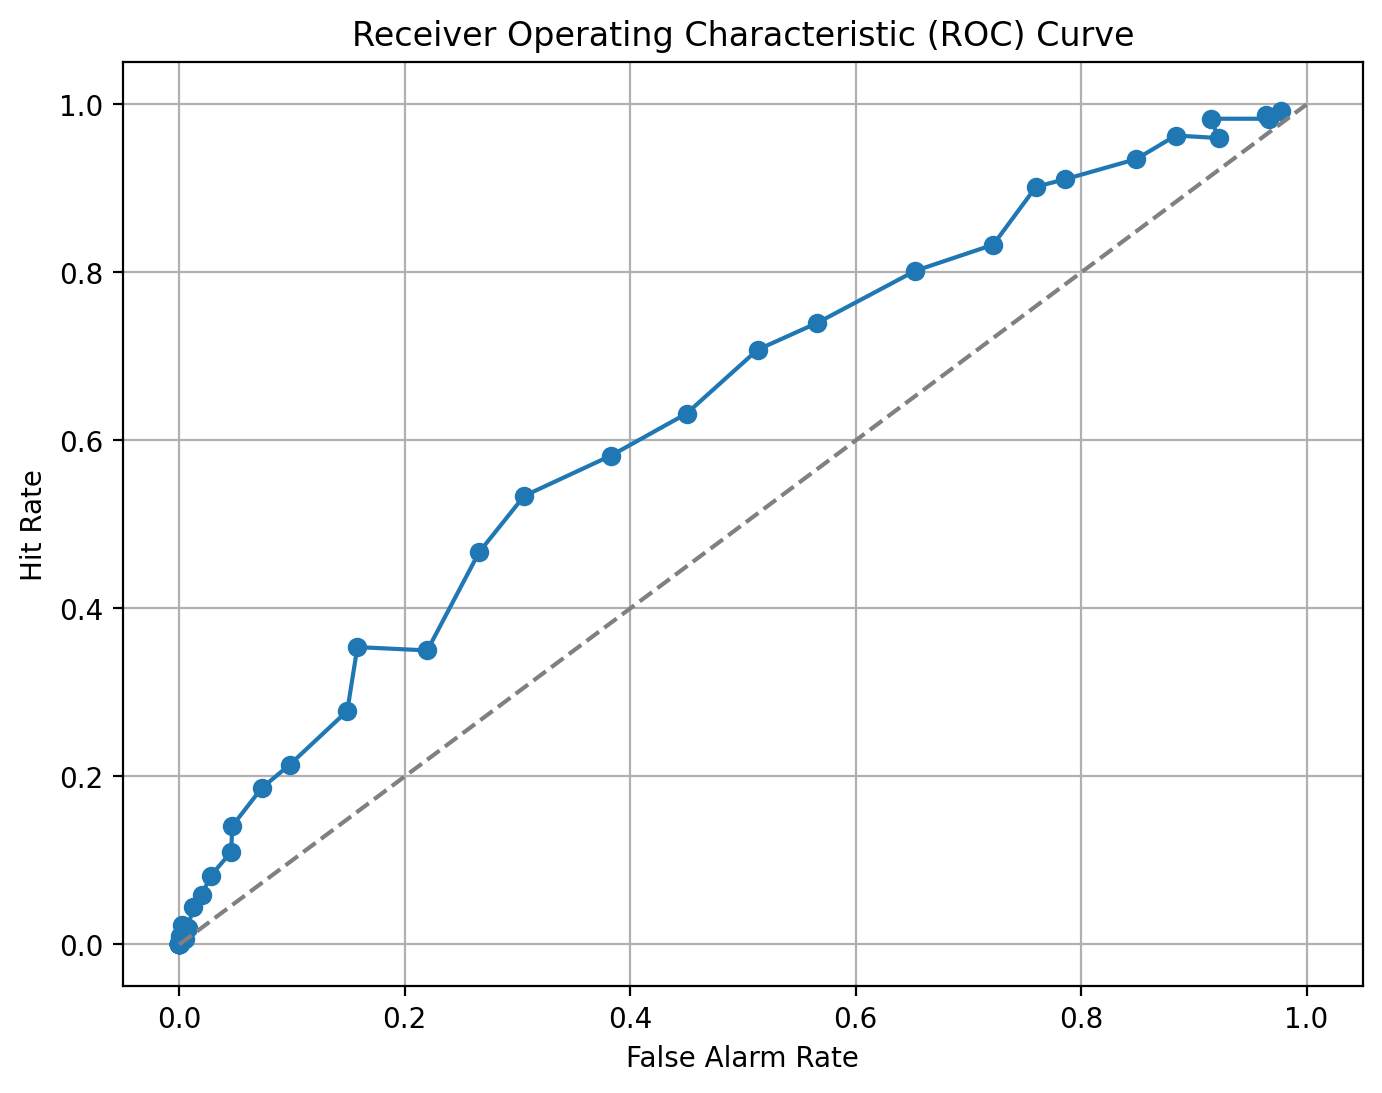

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_alarm_rates, hit_rates, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid(True)
plt.show()

The think we want to look for is how our curve deviagtes from the dashed line, sometimses called the _unity line_ because it represents the case where $x=y$. The farther towards the upper left corner of the plot (and away from the unity line), the more discriminable the signal is from the noise (i.e., higher $d'$).

We can quantify the this curve more directly by calculating the _area under the curve_ (AUC). The higher the AUC the greater the signal to noise.

In [ ]:
# Calculate the AUC
AUC = np.sum(hit_rates)/num_agents
print(f"AUC: {AUC:.2f}")


AUC: 0.32


---
### Question 2.1

Rerun the experiment above but change the signal strength to $2.0$. How does the ROC curve change? How does the AUC change?

__Answer:__

The ROC curve widens with a higher number of hits. The AUC gets bigger as the area under the curve increases.

---
###Question 2.2

Rerun the experiment above but change the signal strength to $0.5$. How does the ROC curve change? How does the AUC change?

__Answer:__

The ROC curve became smaller, because there were more false alarms and fewer hits. The AUC also decreased as the area under the curve decreased.

---
### Question 2.3

Now we can test a little bit of your coding skills to address an interesting phenomenon.

Copy the _for loop_ code in the cell that creates the ROC curve above and paste it below. Revise the code in these ways:

1. Hold the threshold constant at $1.0$.
2. Vary the noise standard deviations from $0.25$ to $4.0$.
3. Set the signal strength to $2.0$.
4. Revise the _for loop_ accordingly to vary the noise standard deviations instead of threshold.

Then copy the plotting code to create the ROC curve.

In [ ]:
# INSERT LOOP CODE
num_trials = 1000
num_agents = 50
noise_stds = np.linspace(0.25, 4.0, num=num_agents)
signal_strength = 2.0
threshold = 1.0  # hold threshold constant
hit_rates = []
false_alarm_rates = []
correct_rejection_rates = []

for noise_std in noise_stds:
    # Simulate data (signal + noise)
    noise = np.random.normal(0, noise_std, num_trials)
    signal = np.random.normal(signal_strength, noise_std, num_trials)

    # Compute hits and false alarms using the function
    hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

    # Compute hit rate and false alarm rate
    hit_rates.append(hits)
    false_alarm_rates.append(false_alarms)
    correct_rejection_rates.append(correct_rejections)

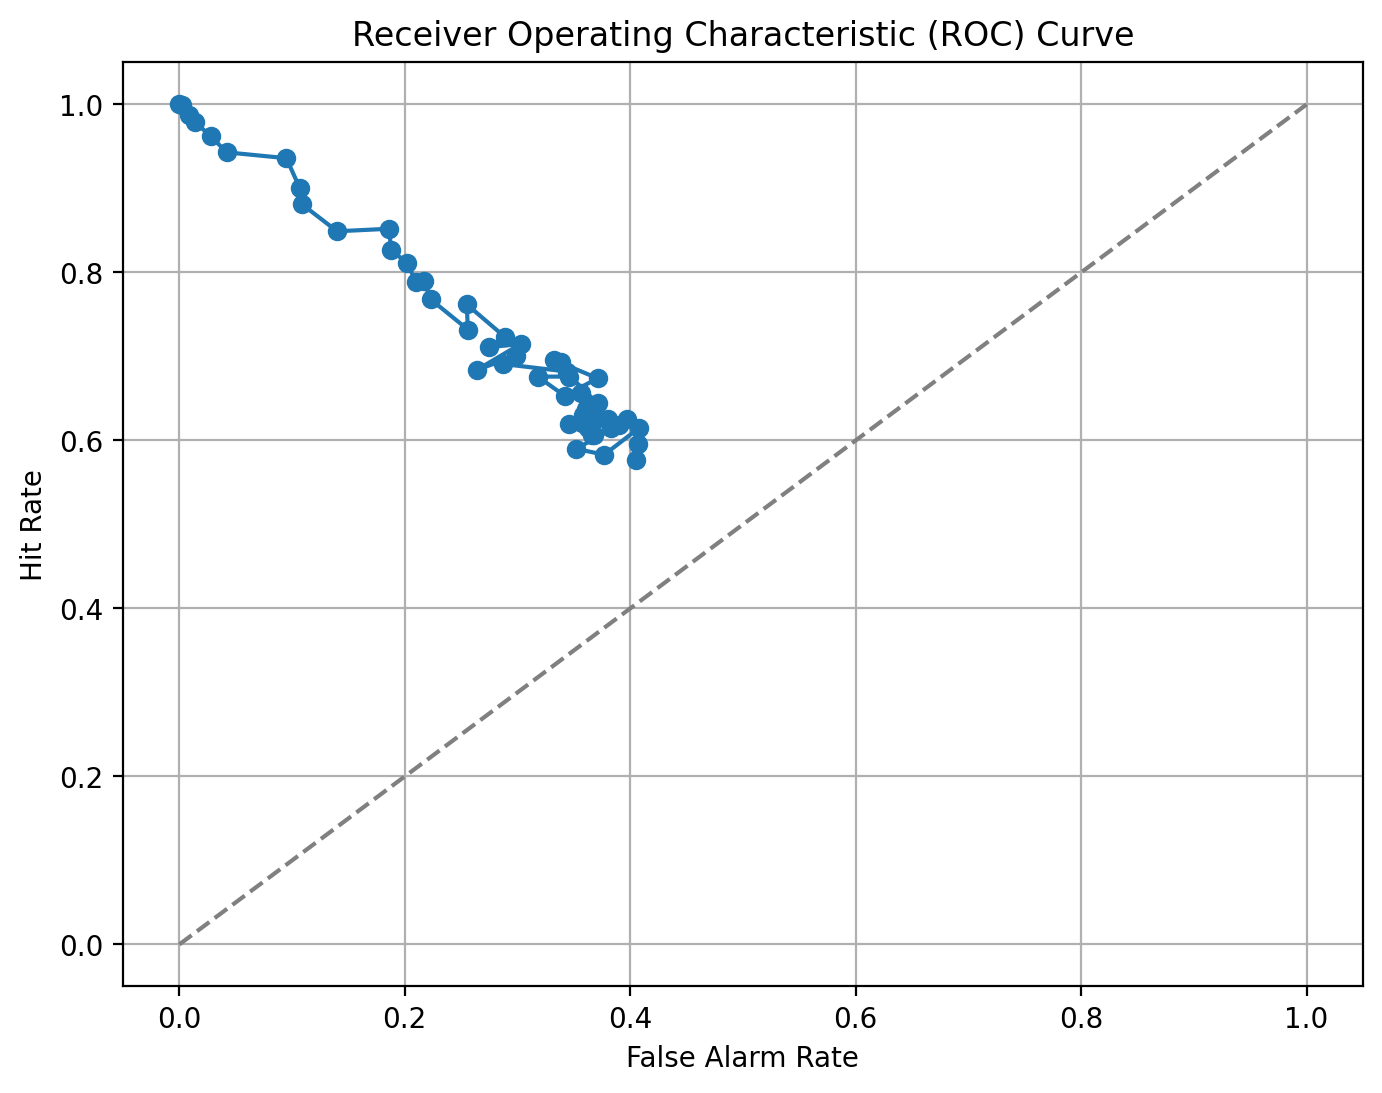

In [ ]:
# INSERT PLOTTING CODE
plt.figure(figsize=(8, 6))
plt.plot(false_alarm_rates, hit_rates, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid(True)
plt.show()

_Question_: How has the ROC curve changed? What does this change tell you about this other dimension of the ROC curve?  

__Answer:__

The ROC is not as much of a curve. It has less variability than before. It remains above the unity line. Since the threshold is constant, the curve does not exceed a false alarm rate of 0.4. The ROC curve goes in the opposite direction of the unity line. Instead of the hit rate increasing as the false alarm rate increases, the hit rate is decreasing as the false alarm rate increases.


---
**IMPORTANT** Did you collaborate with anyone on this assignment, or use LLMs like ChatGPT? If so, list their names here.
> *Write Name(s) here*